# Intoduction

Being anonymous over the internet can sometimes make people say nasty things that they normally would not in real life. Let's filter out the hate from our platforms one comment at a time.

# Objective
 

To create an EDA/ feature-engineering starter notebook for toxic comment classification.

# Data Overview

The dataset here is from wiki corpus dataset which was rated by human raters for toxicity. The corpus contains 63M comments from discussions relating to user pages and articles dating from 2004-2015.

Different platforms/sites can have different standards for their toxic screening process. Hence the comments are tagged in the following five categories

**EDA**

> I will visulaize and analysis the comments in the training data before moving on to the modeling section.

**Install and import necessary packages**

In [1]:
!pip install --upgrade pyicu

ERROR: Could not find a version that satisfies the requirement pyicu (from versions: none)
ERROR: No matching distribution found for pyicu


In [2]:
!pip install -q polyglot



In [3]:
!pip install --upgrade Word2Vec

ERROR: Could not find a version that satisfies the requirement Word2Vec (from versions: none)
ERROR: No matching distribution found for Word2Vec


In [4]:
!pip install  --upgrade smart-open

Requirement already up-to-date: smart-open in /opt/conda/lib/python3.6/site-packages (1.10.0)


In [5]:
!pip install --upgrade utils

ERROR: Could not find a version that satisfies the requirement utils (from versions: none)
ERROR: No matching distribution found for utils


In [6]:
!pip install --upgrade googletrans

ERROR: Could not find a version that satisfies the requirement googletrans (from versions: none)
ERROR: No matching distribution found for googletrans


In [7]:
!pip install --upgrade pycld2

ERROR: Could not find a version that satisfies the requirement pycld2 (from versions: none)
ERROR: No matching distribution found for pycld2


In [8]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re
import folium
from scipy import stats
from colorama import Fore, Back, Style, init
import string
import math
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as ss

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot
import string
import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model
from kaggle_datasets import KaggleDatasets
from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *



from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer

from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer  

import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from googletrans import Translator
from nltk import WordNetLemmatizer
from polyglot.detect import Detector
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
stopword=set(STOPWORDS)
#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'googletrans'

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/test-en-df/test_en.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv
/kaggle/input/val-en-df/validation_en.csv
/kaggle/input/jplu-tf-xlm-roberta-large/config.json
/kaggle/input/jplu-tf-xl

In [10]:
valid1=pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-test-translated/jigsaw_miltilingual_valid_translated.csv')
valid1.head()

,id,comment_text,translated,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,This user does not even make it to the rank of...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,The text of this entry appears to be like I di...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,It is worth it. Only expose my past. All time ...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,Of this article as a sub-heading with maintain...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,"I guess while they're At of the city, district...",tr,0


In [11]:
validate=pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv')
validate.head()

,id,comment_text,lang,toxic,input_word_ids,input_mask,all_segment_id
0,0,Este usuario ni siquiera llega al rango de ...,es,0,"(101, 12515, 82849, 10414, 10294, 39190, 10113...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Il testo di questa voce pare esser scopiazzato...,it,0,"(101, 10282, 29346, 10120, 14508, 19696, 22606...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1,"(101, 32286, 119, 101911, 11419, 27119, 10797,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0,"(101, 11916, 10824, 71339, 10245, 15499, 24542...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0,"(101, 47197, 20267, 10371, 14349, 66513, 31268...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [12]:
comment=pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv")
display(comment.head())
print("Shape:",comment.shape)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Shape: (223549, 11)


In [13]:
validation=pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv")
display(validation.head())
print('shape:',validation.shape)

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0


shape: (8000, 4)


In [14]:
test_processed=pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv")
display(test_processed.head())
print('shape:',test_processed.shape)

,id,comment_text,input_word_ids,input_mask,all_segment_id
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,"(101, 17376, 14516, 19165, 56324, 10116, 24542...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"Вполне возможно, но я пока не вижу необходимо...","(101, 511, 53204, 36689, 44504, 117, 11279, 57...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"Quindi tu sei uno di quelli conservativi , ...","(101, 35921, 17938, 13055, 13868, 11381, 10120...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,"(101, 59170, 16822, 99087, 10284, 83972, 51782...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,"(101, 131, 32070, 11759, 131, 11045, 23388, 10...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


shape: (63812, 5)


In [15]:
train=pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv")
display(train.head())
print("Shape:",train.shape)



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Shape: (223549, 8)


In [16]:
test=pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv')
display(test.head())
print("shape:",test.shape)


,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


shape: (63812, 3)


In [17]:
test['lang'].unique()

array(['tr', 'ru', 'it', 'fr', 'pt', 'es'], dtype=object)

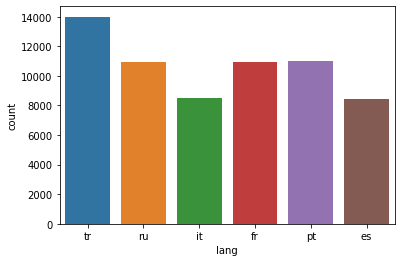

In [18]:
sns.countplot(test['lang'])

In [19]:
train_bias=pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv")
display(train_bias.head())
print("shape:",train_bias.shape)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,input_word_ids,input_mask,all_segment_id
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 10747, 10124, 10380, 67420, 119, 10377, ...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 91327, 13028, 106, 106, 10747, 10894, 13...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 10747, 10124, 11049, 10151, 10399, 22500...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"(101, 12034, 10531, 26133, 146, 112, 22469, 10...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,0,0,1,0,0.0,4,47,"(101, 10228, 10921, 13028, 75980, 12682, 10301...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


shape: (1902194, 48)


In [20]:
train_bias.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count',
       'input_word_ids', 'input_mask', 'all_segment_id'],
      dtype='object')

In [21]:
submission=pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv")
submission.head()

,id,toxic
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [22]:
nrow_train=train.shape[0]
nrow_test=test.shape[0]
sum=nrow_train+nrow_test
print("       : train : test")
print("rows   :",nrow_train,":",nrow_test)
print("perc   :",round(nrow_train*100/sum),"   :",round(nrow_test*100/sum))

       : train : test
rows   : 223549 : 63812
perc   : 78    : 22


There is 70:30 train:test split and test might be changed in future .
but in this case, train:test 78:22.it indicates that class is balanced in dataset.

In [23]:
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  223549
Total clean comments =  201081
Total tags = 49596


In [24]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)

print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)


Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
filling NA with "unknown"


In [25]:
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")



Check for missing values in Test dataset
id         0
content    0
lang       0
dtype: int64
filling NA with "unknown"


In [26]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470,0.899494
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852,0.300674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Example of Commen**ts:

In [27]:
print("toxic:")
print(train[train.severe_toxic==1].iloc[3,1])
#print(train[train.severe_toxic==1].iloc[5,1])

toxic:
Hi 

Im a fucking bitch.

50.180.208.181


In [28]:
print("severe_toxic:")
print(train[train.severe_toxic==1].iloc[4,1])
#print(train[train.severe_toxic==1].iloc[4,1])

severe_toxic:
What a motherfucking piece of crap those fuckheads for blocking us!


In [29]:
print("Threat:")
print(train[train.threat==1].iloc[1,1])

Threat:
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


In [30]:
print("Obscene:")
print(train[train.obscene==1].iloc[1,1])

Obscene:
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [31]:
print("identity_hate:")
print(train[train.identity_hate==1].iloc[4,1])

identity_hate:
u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie


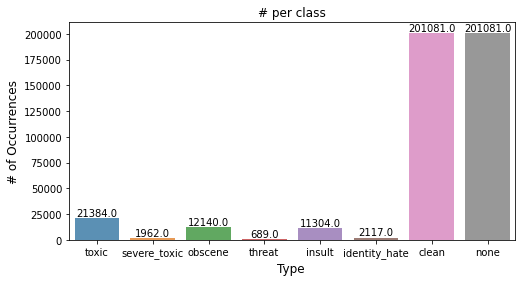

In [32]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

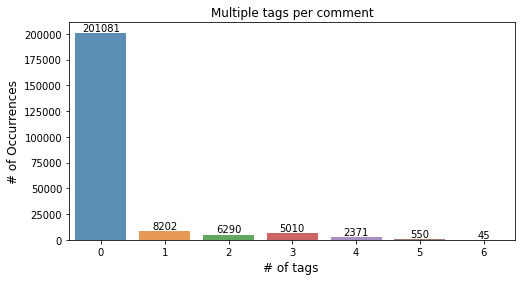

In [33]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [34]:
fig = go.Figure(data=[
    go.Pie(labels=train.columns[2:7],
           values=train.iloc[:, 2:7].sum().values, marker=dict(colors=px.colors.qualitative.Plotly))
])
fig.update_traces(textposition='outside', textfont=dict(color="black"))
fig.update_layout(title_text="Pie chart of labels")
fig.show()

The toxicity is  highly spread out across classes.

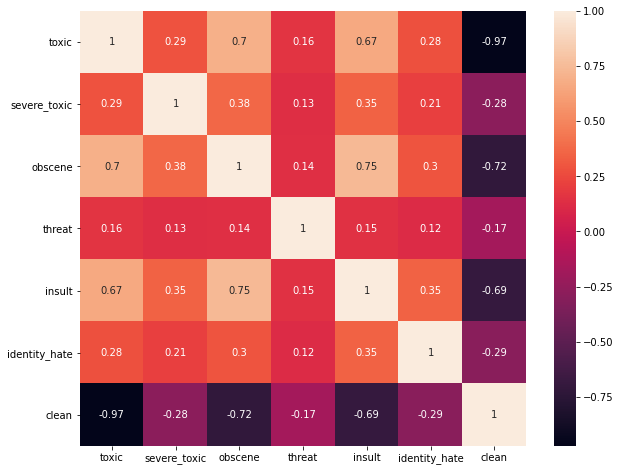

In [35]:
temp_df=train.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [36]:
# https://pandas.pydata.org/pandas-docs/stable/style.html
def highlight_min(data, color='orange'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),index=data.index, columns=data.columns)

In [37]:
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

The above table represents the Crosstab/ consufion matix of Toxic comments with the other classes.

Some interesting observations:

A Severe toxic comment is always toxic

Other classes seem to be a subset of toxic barring a few exceptions

**Wordcloud of all comments**

In [38]:
def nonan(x):
    if type(x)==str:
        return x.replace("\n","")
    else:
        return ""
text=''.join([nonan(abstract)for abstract in train["comment_text"]])
wordcloud=WordCloud(max_font_size=None,background_color="black",collocations=False,width=1240,height=800).generate(text)
fig=px.imshow(wordcloud)
fig.update_layout(title="Common words in comments")

NameError: name 'WordCloud' is not defined

In the wordcloud above, we can see the most common words in the comments. These words include "wikipedia", "page","Thank", and "article" among other words. More offensive words like "f**k" seem to occur less often, indicating that toxic, insulting comments are seen less frequently than non-toxic comments

**Wordclouds-Frequent words:**

Now,let's take a look a t words that are associated with these classes.

Chart Desc:The visuals here are word clouds (ie0 more frequent words appear bigger


A simpler way would be to create a new kaggle dataset and import images from there.

In [39]:
!du -l ../input/*

430392	../input/bert-base-uncased
124	../input/imagesforkernal
4913508	../input/jigsaw-multilingual-toxic-comment-classification
58020	../input/jigsaw-multilingual-toxic-test-translated
653784	../input/jmodelval
3199712	../input/jplu-tf-xlm-roberta-large
2193632	../input/multitpu-inference
50696	../input/test-en-df
5892	../input/val-en-df


In [40]:
!ls ../input/imagesforkernal/
stopword=set(STOPWORDS)

anger.png	      bomb.png	    megaphone.png  swords.png
biohazard-symbol.png  gas-mask.png  safe-zone.png  toxic-sign.png


NameError: name 'STOPWORDS' is not defined

In [41]:
#clean comments
clean_mask=np.array(Image.open("../input/imagesforkernal/safe-zone.png"))
clean_mask=clean_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.clean==True]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

NameError: name 'WordCloud' is not defined

In [42]:
toxic_mask=np.array(Image.open("../input/imagesforkernal/toxic-sign.png"))
toxic_mask=toxic_mask[:,:,1]
#wordcloud for clean comments
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(222)
severe_toxic_mask=np.array(Image.open("../input/imagesforkernal/bomb.png"))
severe_toxic_mask=severe_toxic_mask[:,:,1]
subset=train[train.severe_toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=severe_toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

#Threat comments
plt.subplot(223)
threat_mask=np.array(Image.open("../input/imagesforkernal/anger.png"))
threat_mask=threat_mask[:,:,1]
subset=train[train.threat==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=threat_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Threatening Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

#insult
plt.subplot(224)
insult_mask=np.array(Image.open("../input/imagesforkernal/swords.png"))
insult_mask=insult_mask[:,:,
                        1]
subset=train[train.insult==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=insult_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)


plt.show()


NameError: name 'WordCloud' is not defined

In [43]:
#identity_hate
subset=train[train.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.subplot(111)
identity_hate=np.array(Image.open("../input/imagesforkernal/megaphone.png"))
identity_hate=identity_hate[:,:,1]
subset=train[train.identity_hate==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=identity_hate,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in identity_hate Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
#obsence





NameError: name 'WordCloud' is not defined

NameError: name 'WordCloud' is not defined

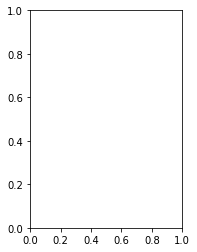

In [44]:
#obsence
plt.subplot(122)
obscene=np.array(Image.open("../input/imagesforkernal/biohazard-symbol.png"))
obscene=obscene[:,:,1]
subset=train[train.obscene==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=obscene,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in obscene Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)


**Languages**

Now,We will go for analysis of language in the dataset and detect the language present in the comments.


In [45]:
def get_language(text):
    return Detector("".join(x for x in text if x.isprintable()), quiet=True).languages[0].name

train["lang"] = train["comment_text"].progress_apply(get_language)

  0%|          | 0/223549 [00:00<?, ?it/s]

NameError: name 'Detector' is not defined

**English Vs Non English**

In [46]:
lang_list=sorted(list(set(train["lang"])))
counts=[list(train["lang"]).count(cont) for cont in lang_list]
df=pd.DataFrame(np.transpose([lang_list,counts]))
df.columns=["Language","Count"]
df["Count"]=df["Count"].apply(int)

display(df["Language"].unique())
display(sns.countplot(df["Language"]))

fig=px.bar(df,x="Language",y="Count",title="Language of comments",color='Language',text="Count",width=700)
display(fig)

KeyError: 'lang'

In [47]:
df["Count"].sum()

NameError: name 'df' is not defined

In [48]:
fig = px.bar(df.query(" Language!='un' & Language != 'en'").query("Count >= 50"),y="Language", x="Count", title="Language of non-English comments",template="plotly_white", color="Language", text="Count", orientation="h")
fig.update_traces(marker=dict(line=dict(width=0.75,color='black')),  textposition="outside")
fig.update_layout(showlegend=False)
fig

NameError: name 'df' is not defined

We can see in bar chart .German(de),Scots(sc) and Danish(da) are the most common non-english languages featuring in the dataset,with more than 100 comments in each language.remaining non english language are not far behind.

In [49]:
fig = go.Figure([go.Pie(labels=df.query("Language!='un' & Language != 'en'").query("Count >= 50")["Language"],
values=df.query(" Language!='un' & Language !='en'").query("Count >= 50")["Count"])])
fig.update_layout(title_text="Pie chart of non-English languages", template="plotly_white")
fig.data[0].marker.colors = [px.colors.qualitative.Plotly[2:]]
fig.data[0].textfont.color = "black"
fig.data[0].textposition = "outside"
fig.show()

NameError: name 'df' is not defined

from the Pie chart above, we can once see that German,Danish ,and Scots with more than 15% of the pie belonging to each of these three languages.

In [50]:
def get_country(Language):
    if Language=="de":
        return "Germany"
    if Language=="sco":
        return "Scotland"
    if Language=="da":
        return "Denmark"
    if Language=="ar":
        return "Saudi Arabia"
    if Language=="es":
        return "Spain"
    if Language=="fa":
        return "Iran"
    if Language=="el":
        return "Greece"
    if Language=="pt":
        return "Portugal"
    
    if Language=="en":
        return "United Kingdom"
    if Language=="ht":
        return "India"
    if Language=="aa":
        return "Albania"
    if Language=="bn":
        return "Bosnia and Herzegovina"
    if Language=="crs":
        return "Croatia"
    if Language=="de":
        return"Netherlands"
    if Language=="sr":
        return "Russia"
    if Language=='vi':
        return "Vietnam"
    if Language=='sm':
        return "Somalia"
    if Language=="sr":
        return "Serbia"
    if Language=="ie":
        return "Indonesia"
    if Language=="mk":
        return "Ireland"
    if Language=="iv":
        return "Holy See (Vatican City State)"
    if Language=="af":
        return "South Africa"
    return "None"
df["country"]=df["Language"].progress_apply(get_country)

NameError: name 'df' is not defined

**World plot of non-English languages**

In [51]:

fig = px.choropleth(df.query("Language != 'en'& Language != 'un' & country != 'None'").query("Count >= 5"), locations="country", hover_name="country",projection="natural earth", locationmode="country names", title="Countries of non-English languages", color="Count",template="plotly", color_continuous_scale="agsunset")
# fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
# fig.data[0].marker.line.width = 0.2
fig.show()

NameError: name 'df' is not defined

from the world plot above .we can see that western Europe and the middle-east are the most represented regions in the dataset .Africa,Asia and eastern Europe are relatively under-represented.


**Non-English European**

In [52]:
fig = px.choropleth(df.query("Language != 'en' & Language != 'un' & country != 'None'"), locations="country", hover_name="country", projection="natural earth", locationmode="country names", title="Non-English European countries", color="Count",template="plotly", color_continuous_scale="aggrnyl", scope="europe")
# fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
# fig.data[0].marker.line.width = 0.2
fig.show()


NameError: name 'df' is not defined

We can see that German and English are the most common European languages to feature in the dataset,although Spanish and Greek are not far behind.

In [53]:
fig = px.choropleth(df.query("Language != 'en' & Language != 'un' "), locations="country", hover_name="country",
                     projection="natural earth", locationmode="country names", title="Asian countries", color="Count",
                     template="plotly", color_continuous_scale="spectral", scope="asia")
# fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
# fig.data[0].marker.line.width = 0.2
fig.show()

NameError: name 'df' is not defined

This plot shows that middle-eastern languages such as Arabic and Persian are represented more than languages from the Indian Subcontinent or south-east Asia,such as Hindi,Vietnamese and Indonesian.There is not a single Comment In amndarin,Korean or Japanese!

In [54]:
fig = px.choropleth(df.query("Language != 'English' & Language != 'un' & country != 'None'").query("Count >= 5"), locations="country", hover_name="country",
                     projection="natural earth", locationmode="country names", title="African countries", color="Count",
                     template="plotly", color_continuous_scale="agsunset", scope="africa")
# fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
# fig.data[0].marker.line.width = 0.2
fig.show()


NameError: name 'df' is not defined

We can see that Africa is not as well as other continents in the dataset.The two most common African languages in the dataset are Afrikans and Somali

# Feature engineering

I've broadly classified my feature engineering ideas into the following three groups.

**Direct Features**

features which are a directly due to word/content .We would exploring the following techniques.
* Word frequency features
    1. Count features
    1. Bigrams
    1. Trigrams
* Vector distance mapping of words(Word2Vec)
* Sentiment scores


**Indirect features**

Some more experimental features.
* count of sentences
* count of words
* count of unique words
* count of letters
* count of punctuations
* count of uppercase words/letters
* count of stop words
* Avg length of each word



**Leaky features**
from the example ,we know that the comments contain identifier information (eg:IP,username etc.).We can create features out of them but ,it will certainly lead to overfitting to this specific wikipedia use-case.
* toxic IP scores
* toxic users
**Note:**Creating the indirect and leaky features first .There are two reasons for this,
* Count features(Direct features)are usefu; only if they are created from a clean corpus
* Also the indirect features help compensate for the loss of information when cleaning the dataset.

In [55]:
merge=pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])
df=merge.reset_index(drop=True)

In [56]:
## Indirect features
# sentence count in each comment:
#'\n 'can be used to count the number of sentences in each comment
df['count_sent']=df["comment_text"].apply(lambda x:len(re.findall("\n",str(x)))+1)
#word count in each comment
df['count_word']=df["comment_text"].apply(lambda x:len(str(x).split()))
#Unique word count
df["count_unique_word"]=df["comment_text"].apply(lambda x:len(set(str(x).split())))
#Letter count
df['count_letters']=df["comment_text"].apply(lambda x:len(str(x)))
#punctuation count


In [57]:
#upper case words count

df["count_words_upper"] = df["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

df["count_word_title"]=df["comment_text"].apply(lambda x:len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"]=df["comment_text"].apply(lambda x:len([w for w in str(x).lower().split() if w in stopword])) 
#Average length of the words
df["mean_word_len"]=df["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

NameError: name 'stopword' is not defined

In [58]:
#derived features
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
#derived features



In [59]:
#serperate train and test features
train_feats=df.iloc[0:len(train),]
test_feats=df.iloc[len(train):,]
#join the tags
train_tags=train.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)

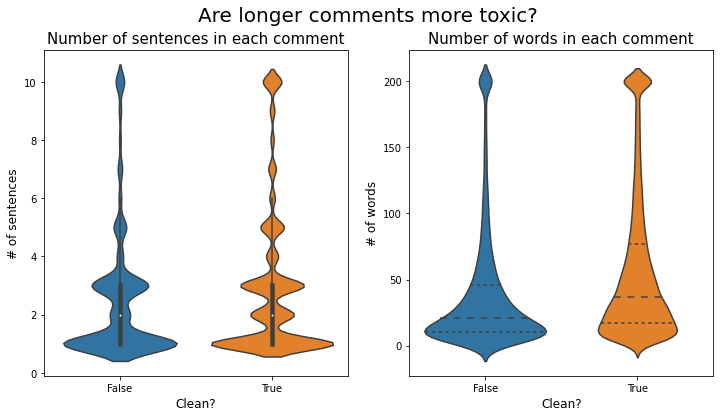

In [60]:
train_feats['count_sent'].loc[train_feats['count_sent']>10] = 10 
plt.figure(figsize=(12,6))
## sentenses
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train_feats,split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)
# words
train_feats['count_word'].loc[train_feats['count_word']>200] = 200
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train_feats,split=True,inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

Long sentences or more words do not seem to be a significant indicator of toxicity.

Chart desc:Violin plot is an alternative to the traditional box plot.The inner markings show the percentiles whi;e the width of the "violin" shows the volume of comments at that level

In [61]:
train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200
#prep for split violin plots
#For the desired plots , the data must be in long format
temp_df = pd.melt(train_feats, value_vars=['count_word', 'count_unique_word'], id_vars='clean')
#spammers - comments with less than 40% unique words
spammers=train_feats[train_feats['word_unique_percent']<30]

Text(0.5, 0, 'Percent unique words')

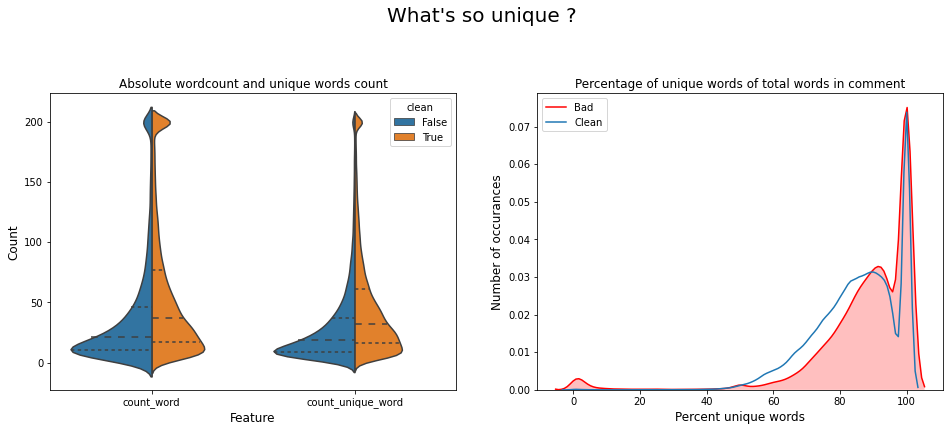

In [62]:
import matplotlib.gridspec as gridspec 
plt.figure(figsize=(16,12))
plt.suptitle("What's so unique ?",fontsize=20)
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x='variable', y='value', hue='clean', data=temp_df,split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot2grid((2,2),(0,1))
plt.title("Percentage of unique words of total words in comment")
#sns.boxplot(x='clean', y='word_unique_percent', data=train_feats)
ax=sns.kdeplot(train_feats[train_feats.clean == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train_feats[train_feats.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)




**Corpus cleaning**

Its important to use a clean dataset before creating count features.

In [63]:
corpus=merge.comment_text


In [64]:
#https://drive.google.com/file/d/0B1yuv8YaUVlZZ1RzMFJmc1ZsQmM/view
# Aphost lookup dict
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [65]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    
    
    comment=re.sub("\\n","",comment)
    # remove leaky elements like ip,user
    comment=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    #removing usernames
    comment=re.sub("\[\[.*\]","",comment)
    
    #Split the sentences into words
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    #clean_sent=re.sub("\W+"," ",clean_sent)
    #clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)


In [66]:
corpus.iloc[12235]

'"\n\n NOTE If you read above, and follow the links, any reader can see that I cited correctly the links I added on this subject. Vidkun has added anotations to make them read as the oposite, but these links show the ""official"" line taken by UGLE. I will not be trapped by any User into so-called 3RR, so he can peddle his POV. Strangly, ALL other ""MASONS"" are quiet, leaving ‘‘me’’ to defend that factual truth on my own. ""Thanks"" Brethren. Sitting any blocking out if given...  "'

In [67]:
clean(corpus.iloc[12235])

NameError: name 'tokenizer' is not defined

# Building Model

In [68]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [69]:
def regular_encode(texts,tokenizer,maxlen=512):
    enc_di=tokenizer.batch_encode_plus(texts,return_attention_masks=False,return_token_type_ids=False,pad_to_max_length=True,max_langth=maxlen)
    return np.array(enc_di['input_ids'])

In [70]:
def build_model(transformer, loss='binary_crossentropy', max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    x = tf.keras.layers.Dropout(0.3)(cls_token)
    out = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss=loss, metrics=[tf.keras.metrics.AUC()])
    
    return model


# TPU Configs

In [71]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)


REPLICAS:  1


In [72]:

import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors

In [73]:
AUTO = tf.data.experimental.AUTOTUNE



# Configuration
EPOCHS = 2
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 192
MODEL = 'jplu/tf-xlm-roberta-large'
#GCS_DS_PATH = KaggleDatasets().get_gcs_path('kaggle/input/')

**Create fast tokenizer**

In [74]:
# First load the real tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

OSError: Can't load 'jplu/tf-xlm-roberta-large'. Make sure that:

- 'jplu/tf-xlm-roberta-large' is a correct model identifier listed on 'https://huggingface.co/models'

- or 'jplu/tf-xlm-roberta-large' is the correct path to a directory containing a 'config.json' file



In [75]:
train = pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv")
train2 = pd.read_csv("/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv")
train2.toxic=train2.toxic.round().astype(int)
valid = pd.read_csv('/kaggle/input/val-en-df/validation_en.csv')
test = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv')
sub = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv')

In [76]:
# Combine train1 with a subset of train2
train = pd.concat([
    train[['comment_text', 'toxic']],
    train2[['comment_text', 'toxic']].query('toxic==1'),
    train2[['comment_text', 'toxic']].query('toxic==0').sample(n=100000, random_state=0)
])

In [77]:
%%time 

x_train = regular_encode(train.comment_text.values, tokenizer, maxlen=MAX_LEN)
x_valid = regular_encode(valid.comment_text.values, tokenizer, maxlen=MAX_LEN)
x_test = regular_encode(test.content.values, tokenizer, maxlen=MAX_LEN)

y_train = train.toxic.values
y_valid = valid.toxic.values

NameError: name 'tokenizer' is not defined

In [78]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = [(
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)

SyntaxError: unexpected EOF while parsing (<ipython-input-78-1fb76e9f59ed>, line 22)

****

In [79]:
%%time
with strategy.scope():
    transformer_layer = transformers.TFBertModel.from_pretrained('bert-base-uncased')
    model = build_model(transformer_layer, loss=focal_loss(gamma=1.5), max_len=512)
model.summary()

OSError: Couldn't reach server at 'https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json' to download pretrained model configuration file.

**Train Model**

First,we train in the subset of taining set,which is completely in English.

In [80]:
n_steps = x_train.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=valid_dataset,
    epochs=EPOCHS
)

NameError: name 'x_train' is not defined

Now that we have pretty much saturated the learning potential of the model on english only data,we train it one more epoch on the validation set,which is significantly smaller but contains a mixture of diffferent languages.


In [81]:
n_steps = x_valid.shape[0] // BATCH_SIZE
train_history_2 = model.fit(
    valid_dataset.repeat(),
    steps_per_epoch=n_steps,
    epochs=EPOCHS
)

NameError: name 'x_valid' is not defined

And finally, create the submission file.

In [82]:
sub['toxic'] = model.predict(test_dataset, verbose=1)
sub.to_csv('submission.csv', index=False)


NameError: name 'model' is not defined

In [83]:
sub.head()

,id,toxic
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


* # Please UPVOTE me and comments for any suggestion regarding this notebook